In [1]:
import pandas as pd
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-12-02 21:56:55,233 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-12-02 21:56:55,234 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 21:56:55,235 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-12-02 21:56:55,236 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 21:56:55,238 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("ontime")
2019-12-02 21:56:55,240 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 21:56:55,246 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-12-02 21:56:55,249 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 21:56:55,254 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("ontime")
2019-12-02 21:56:55,255 INFO sqlalchemy.engine.base.Engine ()
2019-12-02 21:56:55,259 INFO sqlalchemy.engine.base.Engine PRAGMA temp

In [3]:
def intervals(timeDelay):
    ranges = {
        "12:00AM-5:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) < 600).all(),
        "6:00AM-6:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 559, cols.CRSDepTime.cast(db.Integer) < 700).all(),
        "7:00AM-7:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 659, cols.CRSDepTime.cast(db.Integer) < 800).all(),
        "8:00AM-8:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 759, cols.CRSDepTime.cast(db.Integer) < 900).all(),
        "9:00AM-9:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 859, cols.CRSDepTime.cast(db.Integer) < 1000).all(),
        "10:00AM-10:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 959, cols.CRSDepTime.cast(db.Integer) < 1100).all(),
        "11:00AM-11:59AM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1059, cols.CRSDepTime.cast(db.Integer) < 1200).all(),
        "12:00PM-12:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1159, cols.CRSDepTime.cast(db.Integer) < 1300).all(),
        "1:00PM-1:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1259, cols.CRSDepTime.cast(db.Integer) < 1400).all(),
        "2:00PM-2:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1359, cols.CRSDepTime.cast(db.Integer) < 1500).all(),
        "3:00PM-3:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1459, cols.CRSDepTime.cast(db.Integer) < 1600).all(),
        "4:00PM-4:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1559, cols.CRSDepTime.cast(db.Integer) < 1700).all(),
        "5:00PM-5:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1659, cols.CRSDepTime.cast(db.Integer) < 1800).all(),
        "6:00PM-6:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1759, cols.CRSDepTime.cast(db.Integer) < 1900).all(),
        "7:00PM-7:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1859, cols.CRSDepTime.cast(db.Integer) < 2000).all(),
        "8:00PM-8:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 1959, cols.CRSDepTime.cast(db.Integer) < 2100).all(),
        "9:00PM-9:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 2059, cols.CRSDepTime.cast(db.Integer) < 2200).all(),
        "10:00PM-10:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 2159, cols.CRSDepTime.cast(db.Integer) < 2300).all(),
        "11:00PM-11:59PM": session.query(cols.CRSDepTime).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.CRSDepTime.cast(db.Integer) > 2259).all()
    }
    interval_totals = {}
    for key in ranges.keys():
        interval_totals[key] = len(ranges[key])
    return interval_totals

In [4]:
onehour = intervals(60)
threehours = intervals(180)
fivehours = intervals(300)

2019-12-02 21:56:55,374 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-12-02 21:56:55,377 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 21:56:55,378 INFO sqlalchemy.engine.base.Engine (60, 600)
2019-12-02 21:57:24,873 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 21:57:24,877 INFO sqlalchemy.engine.base.Engine (60, 559, 700)
2019-12-02 21:57:50,403 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 21:57:50,404 INFO sqlalchemy.engine.ba

2019-12-02 22:07:12,891 INFO sqlalchemy.engine.base.Engine (180, 959, 1100)
2019-12-02 22:07:36,866 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 22:07:36,866 INFO sqlalchemy.engine.base.Engine (180, 1059, 1200)
2019-12-02 22:08:00,831 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 22:08:00,832 INFO sqlalchemy.engine.base.Engine (180, 1159, 1300)
2019-12-02 22:08:26,495 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGE

2019-12-02 22:17:10,195 INFO sqlalchemy.engine.base.Engine (300, 1559, 1700)
2019-12-02 22:17:33,585 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 22:17:33,586 INFO sqlalchemy.engine.base.Engine (300, 1659, 1800)
2019-12-02 22:17:55,892 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEGER) < ?
2019-12-02 22:17:55,892 INFO sqlalchemy.engine.base.Engine (300, 1759, 1900)
2019-12-02 22:18:17,790 INFO sqlalchemy.engine.base.Engine SELECT ontime."CRSDepTime" AS "ontime_CRSDepTime" 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."CRSDepTime" AS INTEGER) > ? AND CAST(ontime."CRSDepTime" AS INTEG

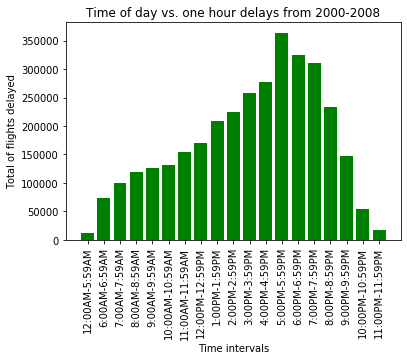

In [8]:
plt.bar(onehour.keys(), onehour.values(), width=0.8, color='g')
plt.xticks(range(len(onehour)), onehour.keys(), rotation=90)
plt.title("Time of day vs. one hour delays from 2000-2008")
plt.xlabel("Time intervals")
plt.ylabel("Total of flights delayed")
plt.show()

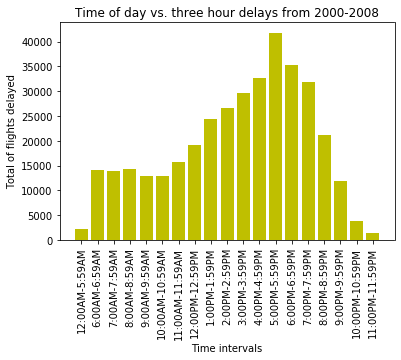

In [10]:
plt.bar(threehours.keys(), threehours.values(), width=0.8, color='y')
plt.xticks(range(len(threehours)), threehours.keys(), rotation=90)
plt.title("Time of day vs. three hour delays from 2000-2008")
plt.xlabel("Time intervals")
plt.ylabel("Total of flights delayed")
plt.show()

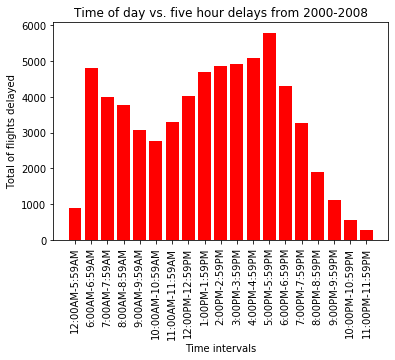

In [11]:
plt.bar(fivehours.keys(), fivehours.values(), width=0.8, color='r')
plt.xticks(range(len(fivehours)), fivehours.keys(), rotation=90)
plt.title("Time of day vs. five hour delays from 2000-2008")
plt.xlabel("Time intervals")
plt.ylabel("Total of flights delayed")
plt.show()

In [13]:
sum(onehour.values())

3305638

In [14]:
onehour.values()

dict_values([12873, 73622, 99076, 118969, 126266, 132097, 153628, 169337, 209604, 225156, 257936, 276554, 363591, 324189, 310838, 232540, 147607, 54167, 17588])

In [15]:
onehour

{'12:00AM-5:59AM': 12873,
 '6:00AM-6:59AM': 73622,
 '7:00AM-7:59AM': 99076,
 '8:00AM-8:59AM': 118969,
 '9:00AM-9:59AM': 126266,
 '10:00AM-10:59AM': 132097,
 '11:00AM-11:59AM': 153628,
 '12:00PM-12:59PM': 169337,
 '1:00PM-1:59PM': 209604,
 '2:00PM-2:59PM': 225156,
 '3:00PM-3:59PM': 257936,
 '4:00PM-4:59PM': 276554,
 '5:00PM-5:59PM': 363591,
 '6:00PM-6:59PM': 324189,
 '7:00PM-7:59PM': 310838,
 '8:00PM-8:59PM': 232540,
 '9:00PM-9:59PM': 147607,
 '10:00PM-10:59PM': 54167,
 '11:00PM-11:59PM': 17588}

In [16]:
afternoon_1 = onehour['3:00PM-3:59PM']+ onehour['4:00PM-4:59PM']+ onehour['5:00PM-5:59PM']+ onehour['6:00PM-6:59PM']+ onehour['7:00PM-7:59PM']
perc1 = (afternoon_1/sum(onehour.values())) * 100
afternoon_2 = threehours['3:00PM-3:59PM']+ threehours['4:00PM-4:59PM']+ threehours['5:00PM-5:59PM']+ threehours['6:00PM-6:59PM']+ threehours['7:00PM-7:59PM']
perc2 = (afternoon_2/sum(threehours.values())) * 100
afternoon_3 = fivehours['3:00PM-3:59PM']+ fivehours['4:00PM-4:59PM']+ fivehours['5:00PM-5:59PM']+ fivehours['6:00PM-6:59PM']+ fivehours['7:00PM-7:59PM']
perc3 = (afternoon_3/sum(fivehours.values())) * 100


In [17]:
perc1

46.378581078750905

In [18]:
perc2

46.81685720690428

In [19]:
perc3

36.857629578220134

In [23]:
morning = fivehours['6:00AM-6:59AM']+fivehours['7:00AM-7:59AM']
perc4 = (morning/sum(fivehours.values())) * 100
perc4

13.877409381999431